In [1]:
import numpy as np
from sklearn.metrics import RocCurveDisplay
from drowsiness_detection import config
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [2]:
# true labels
y_true_test = np.load(str(config.PREDICTION_DIR_PATH.joinpath("y_true_test_new.npy")))
y_true_train = np.load(str(config.PREDICTION_DIR_PATH.joinpath("y_true_train_new.npy")))
print(y_true_test[:10])

[1 1 1 1 1 1 1 1 1 1]


In [3]:
# true rf labels
rf_y_true_test = np.load(str(config.PREDICTION_DIR_PATH.joinpath("rf_y_true_test.npy")))
rf_y_true_train = np.load(str(config.PREDICTION_DIR_PATH.joinpath("rf_y_true_train.npy")))
print(rf_y_true_test[:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
# random forest labels
rf_y_pred_test_path = sorted([path for path in config.PREDICTION_DIR_PATH.iterdir() if "rf_y_pred_test" in str(path)])[-1]
rf_y_pred_train_path = sorted([path for path in config.PREDICTION_DIR_PATH.iterdir() if "rf_y_pred_train" in str(path)])[-1]
rf_y_pred_test = np.load(str(rf_y_pred_test_path))
rf_y_pred_train = np.load(str(rf_y_pred_train_path))
print(rf_y_pred_test[:10])
print(rf_y_pred_test_path)

[0.29606957 0.29638342 0.30037317 0.30022842 0.31363877 0.34597696
 0.34902122 0.34528227 0.34890786 0.34586329]
/home/tim/IM/data/predictions/60sec/rf_y_pred_test_20220806-180511.npy


Text(0.5, 1.0, 'ROC Curve of Random Forest Classifier')

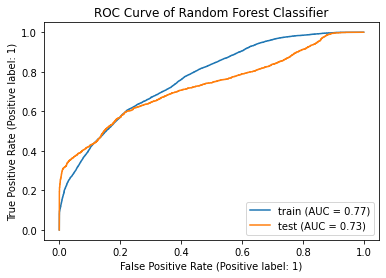

In [6]:
fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(rf_y_true_train, rf_y_pred_train, pos_label=1, ax=ax, name="train")
RocCurveDisplay.from_predictions(rf_y_true_test, rf_y_pred_test, pos_label=1, ax=ax, name="test")
ax.set_title("ROC Curve of Random Forest Classifier")

In [7]:
# cnn labels
cnn_y_pred_test_path = sorted([path for path in config.PREDICTION_DIR_PATH.iterdir() if "cnn_y_pred_test" in str(path)])[-1]
cnn_y_pred_train_path = sorted([path for path in config.PREDICTION_DIR_PATH.iterdir() if "cnn_y_pred_train" in str(path)])[-1]
cnn_y_pred_test = np.array([x[0] for x in np.load(str(cnn_y_pred_test_path))])
cnn_y_pred_train = np.array([x[0] for x in np.load(str(cnn_y_pred_train_path))])
print(cnn_y_pred_test[:10])
cnn_y_pred_test_path

[0.99834263 0.9972007  0.99884665 0.99933416 0.96254    0.9972965
 0.94118917 0.97979486 0.8284981  0.8143566 ]


PosixPath('/home/tim/IM/data/predictions/60sec/cnn_y_pred_test_20220806-145253.npy')

In [8]:
# lstm labels
lstm_y_pred_test_path = sorted([path for path in config.PREDICTION_DIR_PATH.iterdir() if "lstm_y_pred_test" in str(path)])[-1]
lstm_y_pred_train_path = sorted([path for path in config.PREDICTION_DIR_PATH.iterdir() if "lstm_y_pred_train" in str(path)])[-1]
lstm_y_pred_test = np.array([x[0] for x in np.load(str(lstm_y_pred_test_path))])
lstm_y_pred_train = np.array([x[0] for x in np.load(str(lstm_y_pred_train_path))])
print(lstm_y_pred_test[:10])

[0.35123426 0.94333285 0.8440125  0.91396546 0.91904247 0.86894596
 0.9077249  0.9204272  0.92410547 0.9247377 ]


In [9]:
# resnet labels
resnet_y_pred_test_path = sorted([path for path in config.PREDICTION_DIR_PATH.iterdir() if "resnet_y_pred_test" in str(path)])[-1]
resnet_y_pred_train_path = sorted([path for path in config.PREDICTION_DIR_PATH.iterdir() if "resnet_y_pred_train" in str(path)])[-1]
resnet_y_pred_test = np.load(str(resnet_y_pred_test_path))[:,1]
resnet_y_pred_train = np.load(str(resnet_y_pred_train_path))[:,1]
resnet_y_pred_train_path

PosixPath('/home/tim/IM/data/predictions/60sec/resnet_y_pred_train_20220807-115641.npy')

In [30]:
# transformer labels
transformer_y_pred_test_path = sorted([path for path in config.PREDICTION_DIR_PATH.iterdir() if "transformer_y_pred_test" in str(path)])[-1]
transformer_y_pred_train_path = sorted([path for path in config.PREDICTION_DIR_PATH.iterdir() if "transformer_y_pred_train" in str(path)])[-1]
transformer_y_pred_test = np.load(str(transformer_y_pred_test_path))
transformer_y_pred_train = np.load(str(transformer_y_pred_train_path))
print(transformer_y_pred_test[:10])

[0 0 0 0 0 0 0 0 0 0]


#################################Random Forest################################# 
               precision    recall  f1-score   support

         0.0       0.76      0.71      0.73     15322
         1.0       0.60      0.66      0.63     10321

    accuracy                           0.69     25643
   macro avg       0.68      0.68      0.68     25643
weighted avg       0.70      0.69      0.69     25643

######################################CNN###################################### 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     15322
           1       0.95      0.88      0.91     10321

    accuracy                           0.93     25643
   macro avg       0.93      0.92      0.93     25643
weighted avg       0.93      0.93      0.93     25643

######################################LSTM##################################### 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85  

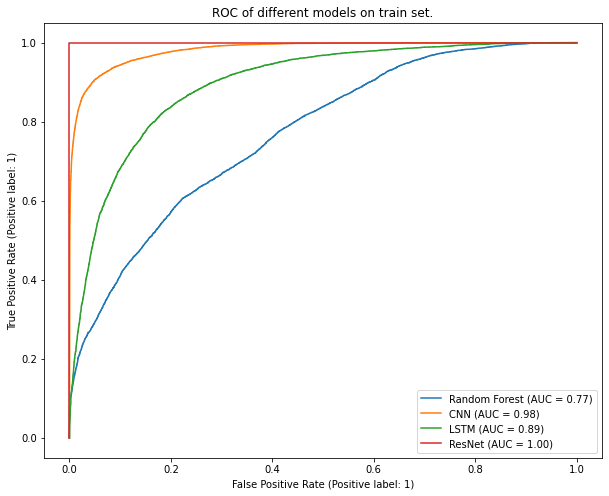

In [10]:
plt.rcParams["figure.figsize"] = 10,8
fig, ax =plt.subplots()
ax.set_title("ROC of different models on train set.")
y_preds_test = [rf_y_pred_train, cnn_y_pred_train, lstm_y_pred_train, resnet_y_pred_train]
# y_preds_test = [rf_y_pred_train, cnn_y_pred_train, lstm_y_pred_train, resnet_y_pred_train, transformer_y_pred_train]
# names = ["Random Forest", "CNN", "LSTM", "ResNet", "Transformer"]
names = ["Random Forest", "CNN", "LSTM", "ResNet"]
for y_pred, name in zip(y_preds_test, names):
    if name == "Random Forest":
        RocCurveDisplay.from_predictions(y_true=rf_y_true_train, y_pred=y_pred, pos_label=1, ax=ax, name=name)
        report = classification_report(y_true=rf_y_true_train, y_pred=y_pred > .5)
    else:
        RocCurveDisplay.from_predictions(y_true=y_true_train, y_pred=y_pred, pos_label=1, ax=ax, name=name)
        report = classification_report(y_true=y_true_train, y_pred=y_pred > .5)
    print(name.center(79, "#"),"\n",report)

#################################Random Forest################################# 
               precision    recall  f1-score   support

         0.0       0.75      0.75      0.75      3890
         1.0       0.62      0.62      0.62      2603

    accuracy                           0.70      6493
   macro avg       0.68      0.68      0.68      6493
weighted avg       0.70      0.70      0.70      6493

######################################CNN###################################### 
               precision    recall  f1-score   support

           0       0.71      0.68      0.69      3890
           1       0.55      0.58      0.56      2603

    accuracy                           0.64      6493
   macro avg       0.63      0.63      0.63      6493
weighted avg       0.64      0.64      0.64      6493

######################################LSTM##################################### 
               precision    recall  f1-score   support

           0       0.79      0.70      0.74  

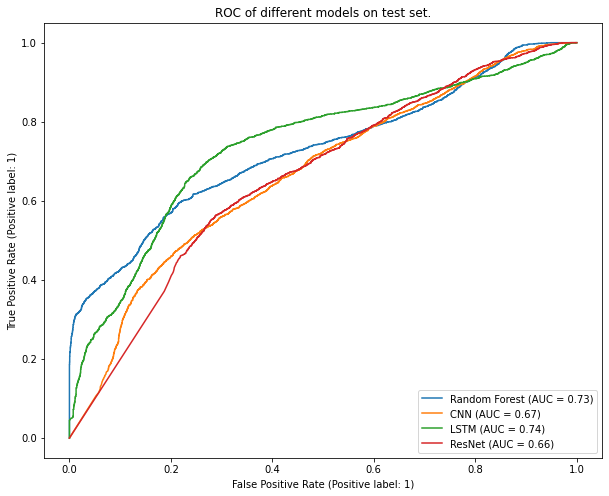

In [11]:
plt.rcParams["figure.figsize"] = 10,8
fig, ax =plt.subplots()
ax.set_title("ROC of different models on test set.")
y_preds_test = [rf_y_pred_test, cnn_y_pred_test, lstm_y_pred_test, resnet_y_pred_test]
# y_preds_test = [rf_y_pred_test, cnn_y_pred_test, lstm_y_pred_test, resnet_y_pred_test, transformer_y_pred_test]
# names = ["Random Forest", "CNN", "LSTM", "ResNet", "Transformer"]
names = ["Random Forest", "CNN", "LSTM", "ResNet"]
for y_pred, name in zip(y_preds_test, names):
    if name == "Random Forest":
        RocCurveDisplay.from_predictions(y_true=rf_y_true_test, y_pred=y_pred, pos_label=1, ax=ax, name=name)
        report = classification_report(y_true=rf_y_true_test, y_pred=y_pred > .5)
    else:
        RocCurveDisplay.from_predictions(y_true=y_true_test, y_pred=y_pred, pos_label=1, ax=ax, name=name)
        report = classification_report(y_true=y_true_test, y_pred=y_pred > .5)
    print(name.center(79, "#"),"\n",report)